# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

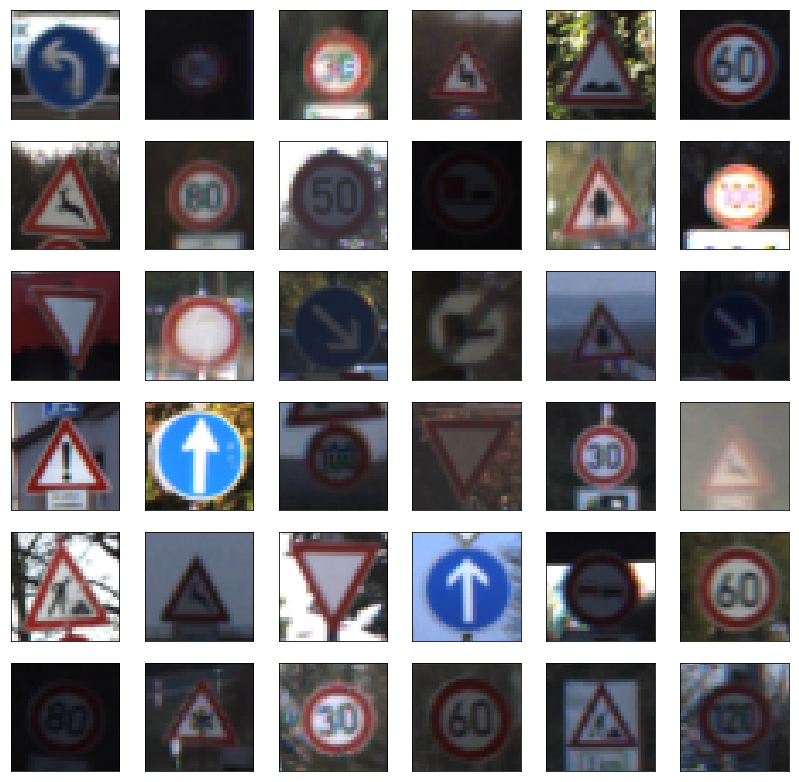

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
def plot_training_examples(X_train):
    indices_for_plotting = np.random.randint(0, X_train.shape[0]-1, 36)
    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(14, 14))
    axes = axes.flatten()
    for i in range(36):
        axes[i].imshow(X_train[indices_for_plotting[i],:])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.show()
    
plot_training_examples(X_train)

The sample plots look fine. Next, plot the number of pictures for each class in training, validation, and test sets. Also plot the relative number per label of validation set and test set w.r.t. the training set. 

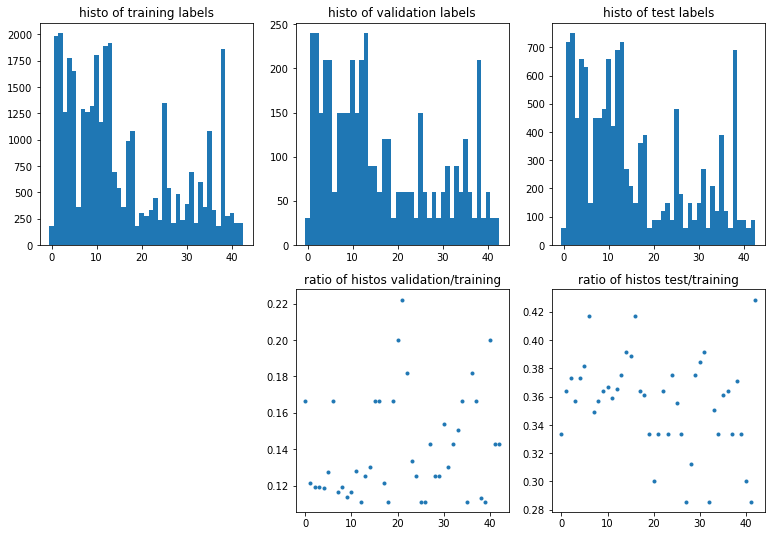

In [6]:
def plot_label_occurence(y_train, y_valid, y_test):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 9))
    axes = axes.flatten()
    hist_train_labels = axes[0].hist(y_train, np.arange(-0.5, n_classes))
    axes[0].set_title('histo of training labels')
    hist_valid_labels = axes[1].hist(y_valid, np.arange(-0.5, n_classes))
    axes[1].set_title('histo of validation labels')
    hist_test_labels = axes[2].hist(y_test, np.arange(-0.5, n_classes))
    axes[2].set_title('histo of test labels')
    fig.delaxes(axes[3])
    axes[4].plot(np.arange(0, n_classes), np.divide(hist_valid_labels[0], hist_train_labels[0]), '.')
    axes[4].set_title('ratio of histos validation/training')
    axes[5].plot(np.arange(0, n_classes), np.divide(hist_test_labels[0], hist_train_labels[0]), '.')
    axes[5].set_title('ratio of histos test/training')
    plt.show()
    
plot_label_occurence(y_train, y_valid, y_test)

The number of examples per class is not evenly distributed in either of the data sets. Some classes are about 10 times more abundant than others. This can lead to a poor performance of the classification of samples from the less abundant classes. Besides the obvious problem that there are less examples of variations of traffic signs of these classes to learn from, another problem is that their relative weight in the cost function is lower than for the more ubundant classes. The consequences of this imbalance will be visible in the review of classification errors at the bottom of the notebook.

The population of the different classes in the training, validation, and test sets are propotional are compared in the lower row of figures. Some labels over overrepresented in the validation set. The ratio of abundance in validation set divided by abundance in training set ranges reaches up to 22% while most labels are at around lower percentages. The test set looks a little better adjusted. To check whether this feature of the validation set has an effect on the performance of the classifier, the training and validation sets were merged and shuffled, and a new validation set was seperated off. This had no effect on the performance of the classifier in terms of validation accuracy. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

X_train = (X_train-127.5)/127.5
X_test = (X_test-127.5)/127.5
X_valid = (X_valid-127.5)/127.5

### Model Architecture

In [8]:
import tensorflow as tf

### Define your architecture here.
### Feel free to use as many code cells as needed.
def convNet(x, sigma = 0.1, bias_init = 0.01, Nof_kernels_conv1 = 32, Nof_kernels_conv2 = 64, fc1_dim = 250, fc2_dim = 120, filter_size = 3):
    
    # Layer 1: Convolutional (preserves xy size)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, 3, Nof_kernels_conv1), mean = 0, stddev = sigma))
    conv1_b = tf.Variable(bias_init*tf.ones(Nof_kernels_conv1))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    # Max pooling
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional (preserves xy size)
    conv2_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, Nof_kernels_conv1, Nof_kernels_conv2), mean = 0, stddev = sigma))
    conv2_b = tf.Variable(bias_init*tf.ones(Nof_kernels_conv2))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # Max pooling
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.reshape(conv2, [-1, 8 * 8 * Nof_kernels_conv2])

    # Layer 3: Fully connected
    fc1_W = tf.Variable(tf.truncated_normal(shape=(8 * 8 * Nof_kernels_conv2, fc1_dim), mean = 0, stddev = sigma))
    fc1_b = tf.Variable(bias_init*tf.ones(fc1_dim))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    # Apply dropout
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # Layer 4: Fully connected
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(fc1_dim, fc2_dim), mean = 0, stddev = sigma))
    fc2_b  = tf.Variable(bias_init*tf.ones(fc2_dim))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    # Apply dropout
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # Layer 5: Fully Connected output layer
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(fc2_dim, 43), mean = 0, stddev = sigma))
    fc3_b  = tf.Variable(bias_init*tf.ones(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    # Besides the logits, also return the L2 loss of the weights of the layers (not this biases)
    L2_loss = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)

    return logits, L2_loss

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

BATCH_SIZE = 128

# most hyperparameters are the result of random scans

# placeholders for picture and label batches
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# define regularization parameters for dropout and L2 regularization
L2_loss_amplitude = 5.7E-05
DO_keep_prob = 0.5

# placeholder for keep probability of dropout
keep_prob = tf.placeholder(tf.float32)

# get the convnet with the above defined parameters
sigma_init = 0.1
bias_init = 0.001
Nof_kernels_conv1 = 32
Nof_kernels_conv2 = 64
fc1_dim = 250 
fc2_dim = 125
filter_size = 3
logits, L2_loss = convNet(x, sigma_init, bias_init, Nof_kernels_conv1, Nof_kernels_conv2, fc1_dim, fc2_dim, filter_size)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy) + L2_loss_amplitude*L2_loss

# set up the Adam optimizer with learning rate decay
learn_rate_ini = 0.0015
learn_dec_tim = 59
learn_dec_amp = 0.1
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(learn_rate_ini, global_step, learn_dec_tim * (X_train.shape[0] / BATCH_SIZE), learn_dec_amp, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)

# operations for inference and accuracy calculation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# for saving tf ouput
saver = tf.train.Saver()

In [10]:
# define some helper functions
def evaluate(X_data, y_data):
    """
    function for evaluation of loss and accuracy on a data set
    """
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0}) * len(batch_x)
    return total_accuracy / num_examples, total_loss / num_examples

def get_wrong_examples(X_data, y_data):
    """
    function for returning a list of wronglt classified examples in a data set
    """
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    error_index_list = np.ndarray([], int)
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_correctness = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        error_indices = offset+np.where(~batch_correctness)[0]
        error_index_list = np.append(error_index_list, error_indices)
    error_index_list = error_index_list[1:]
    return error_index_list

In [11]:
from sklearn.utils import shuffle
import datetime

EPOCHS = 200

training_log = dict()
training_log['training_accuracy'] = list()
training_log['validation_accuracy'] = list()
training_log['training_loss'] = list()
training_log['validation_loss'] = list()
training_log['learning_rate'] = list()
training_log['epochs'] = list()

trainNewModel = False # this flag just protects from accidentally retraining
if trainNewModel:        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")

        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DO_keep_prob})
            training_accuracy, training_loss = evaluate(X_train, y_train)
            validation_accuracy, validation_loss = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i + 1))
            print('Date: {}'.format(datetime.datetime.now().strftime("%y%m%d_%H%M%S")))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("training loss: {:.2e}".format(training_loss))
            print("validation loss: {:.2e}".format(validation_loss))
            print("learning rate: {:.2e}".format(sess.run(learning_rate)))
            training_log['epochs'].append(i+1)
            training_log['training_accuracy'].append(training_accuracy)
            training_log['validation_accuracy'].append(validation_accuracy)
            training_log['training_loss'].append(training_loss)
            training_log['validation_loss'].append(validation_loss)
            training_log['learning_rate'].append(sess.run(learning_rate))
        saver.save(sess, './training')
        training_log_file = open('training_log.pickle', 'wb')
        pickle.dump(training_log, training_log_file)
        training_log_file.close()
        print("Model saved")

    

The selection of the convnet architecture and the hyperparameters are the result of extensive tries and parameter scans. A validation accuracy of 98.7% is the best result that has been obtained with +-0.2% change due to random initialization.

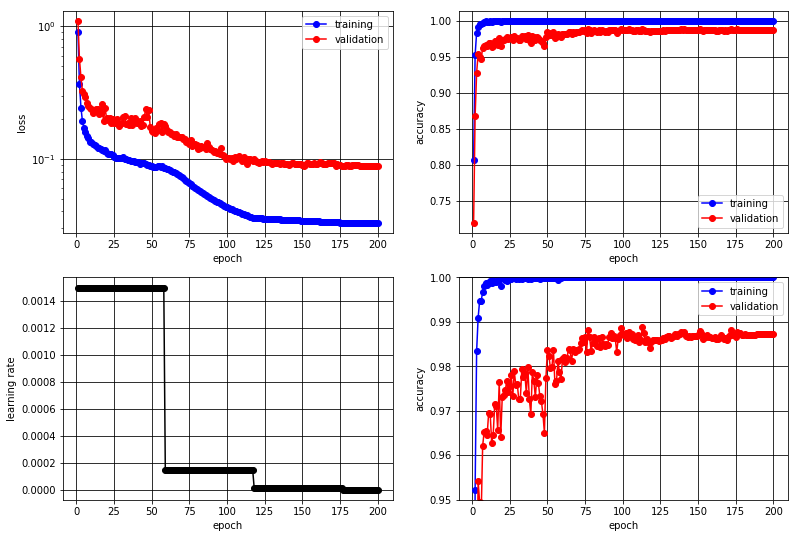

In [12]:
# visualize training

training_log_file = open('training_log.pickle', 'rb')
training_log = pickle.load(training_log_file)

fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(13, 9))
axes2 = axes2.flatten()

axes2[0].plot(training_log['epochs'], training_log['training_loss'], "bo-", label="training")
axes2[0].plot(training_log['epochs'], training_log['validation_loss'], "ro-", label="validation")
axes2[0].set_xlabel('epoch')
axes2[0].set_ylabel('loss')
axes2[0].set_yscale("log", nonposy='clip')
axes2[0].grid(color='k')
axes2[1].plot(training_log['epochs'], training_log['training_accuracy'], "bo-", label="training")
axes2[1].plot(training_log['epochs'], training_log['validation_accuracy'], "ro-", label="validation")
axes2[1].set_xlabel('epoch')
axes2[1].set_ylabel('accuracy')
axes2[1].grid(color='k')
axes2[3].plot(training_log['epochs'], training_log['training_accuracy'], "bo-", label="training")
axes2[3].plot(training_log['epochs'], training_log['validation_accuracy'], "ro-", label="validation")
axes2[3].set_xlabel('epoch')
axes2[3].set_ylabel('accuracy')
axes2[3].set_ylim((0.95, 1.0))
axes2[3].grid(color='k')
axes2[2].plot(training_log['epochs'], training_log['learning_rate'], "ko-")
axes2[2].set_xlabel('epoch')
axes2[2].set_ylabel('learning rate')
axes2[2].grid(color='k')

handles0, labels0 = axes2[0].get_legend_handles_labels()
axes2[0].legend(handles0, labels0)
handles1, labels1 = axes2[1].get_legend_handles_labels()
axes2[1].legend(handles1, labels1)
handles3, labels3 = axes2[3].get_legend_handles_labels()
axes2[3].legend(handles3, labels3)
plt.show()

### Evaluate accuracy on test set
After training has concluded, it is time to evaluate the testing accuracy:

In [13]:
with tf.Session() as sess:
    saver.restore(sess, './training')
    test_accuracy, test_loss = evaluate(X_test, y_test)
    print('Test set accuracy of the model is: {:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./training
Test set accuracy of the model is: 0.979


Plot all the test pictures that are classified wrongly. A lot of them are under- or overexposed, some are blurry, while some of them have no obvious quality flaws.

In [14]:
with tf.Session() as sess:
    saver.restore(sess, './training')
    test_error_indices = get_wrong_examples(X_test, y_test)
fig, axes3 = plt.subplots(nrows=len(test_error_indices) // 6 + 1, ncols=6, figsize=(14, 14*(len(test_error_indices) // 6 + 1)/6))
axes3 = axes3.flatten()
for i in range(len(test_error_indices)):
    # imshow for float expects dynamic range [0,1]
    axes3[i].imshow((X_test[test_error_indices[i], :, :, :] + 1.0) / 2.0) 
    axes3[i].set_xticks([])
    axes3[i].set_yticks([])
    axes3[i].set_title('{}'.format(test_error_indices[i]))
for i in range(len(test_error_indices), 6*(len(test_error_indices)//6+1)):
    fig.delaxes(axes3[i])
plt.show()

INFO:tensorflow:Restoring parameters from ./training


### Precision and recall
In the following cell, precision and recall are printed in a table for all classes:

In [15]:
# calculate precision and recall for each class and output a table
import pandas as pd
sign_names = pd.read_csv('signnames.csv')

predictions = np.empty((n_test))
with tf.Session() as sess:
    saver.restore(sess, './training')
    for offset in range(0, n_test, BATCH_SIZE):
        batch_x = X_test[offset:offset+BATCH_SIZE]
        predictions[offset:offset+BATCH_SIZE] = sess.run(tf.argmax(logits, 1), feed_dict={x: batch_x, keep_prob: 1.0})
predictions = predictions.astype(int)

print('| class index | class text | precision | recall |')
print('| --- | --- | --- | --- |')
for i in range(n_classes):
    prediction_this_class = np.where(np.equal(predictions,i))
    truth_this_class = np.where(np.equal(y_test,i))
    TP = len(np.intersect1d(prediction_this_class, truth_this_class))
    FP = len(np.setdiff1d(prediction_this_class, truth_this_class))
    FN = len(np.setdiff1d(truth_this_class, prediction_this_class))
    print('| {} | {} | {:.3f} | {:.3f} |'.format(i, sign_names['SignName'][i], TP/(TP+FP), TP/(TP+FN)))
                                

INFO:tensorflow:Restoring parameters from ./training
| class index | class text | precision | recall |
| --- | --- | --- | --- |
| 0 | Speed limit (20km/h) | 1.000 | 0.967 |
| 1 | Speed limit (30km/h) | 0.965 | 0.993 |
| 2 | Speed limit (50km/h) | 0.989 | 0.993 |
| 3 | Speed limit (60km/h) | 0.984 | 0.971 |
| 4 | Speed limit (70km/h) | 0.995 | 0.991 |
| 5 | Speed limit (80km/h) | 0.957 | 0.979 |
| 6 | End of speed limit (80km/h) | 1.000 | 0.887 |
| 7 | Speed limit (100km/h) | 0.995 | 0.960 |
| 8 | Speed limit (120km/h) | 0.978 | 0.978 |
| 9 | No passing | 0.986 | 0.994 |
| 10 | No passing for vehicles over 3.5 metric tons | 0.989 | 0.995 |
| 11 | Right-of-way at the next intersection | 0.972 | 0.990 |
| 12 | Priority road | 0.976 | 0.981 |
| 13 | Yield | 0.993 | 0.997 |
| 14 | Stop | 1.000 | 1.000 |
| 15 | No vehicles | 0.942 | 1.000 |
| 16 | Vehicles over 3.5 metric tons prohibited | 0.987 | 0.993 |
| 17 | No entry | 1.000 | 0.997 |
| 18 | General caution | 0.995 | 0.951 |
| 19 | Dang

### Investigation on unbalanced data set
As mentioned earlier, the data set is unbalanced (number of examples per class varies by up to a factor of ten). The trained classifier performs worse on classes with less examples. To see this, plot 1 minus the test recall for each class versus the number of training examples for the same class:

In [16]:
with tf.Session() as sess:
    saver.restore(sess, './training')
    test_error_indices = get_wrong_examples(X_test, y_test)
    test_error_labels = y_test[test_error_indices]
    print('Number of test errors: {}'.format(len(test_error_indices)))
    num_training_per_class = list()
    test_accuracy_per_class = list()
    for i in range(n_classes):
        num_training_this_class = np.sum(np.equal(y_train, i).astype(int))
        num_test_this_class = np.sum(np.equal(y_test, i).astype(int))
        num_test_errors_this_class = np.sum(np.equal(test_error_labels, i).astype(int))
        test_accuracy_this_class = num_test_errors_this_class / num_test_this_class
        num_training_per_class.append(num_training_this_class)
        test_accuracy_per_class.append(test_accuracy_this_class)
        # print('{} {} {} {}'.format(i, num_training_this_class, num_validation_errors_this_class, validation_accuracy_this_class))
    plt.plot(num_training_per_class, test_accuracy_per_class, '.')
    plt.xlabel('number of training examples')
    plt.ylabel('1 - recall')
    plt.title('one data point per class')

INFO:tensorflow:Restoring parameters from ./training
Number of test errors: 268


While there are classes with a low number of training examples and with good test recall, most classes with a poor performance are low statistics classes. This problem would best be solved by collcting more data on these classes. Another possible way to improve this situation would be by duplicating the training examples of these classes (oversampling) to increase their weight in the optimization of the overall cost function. 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

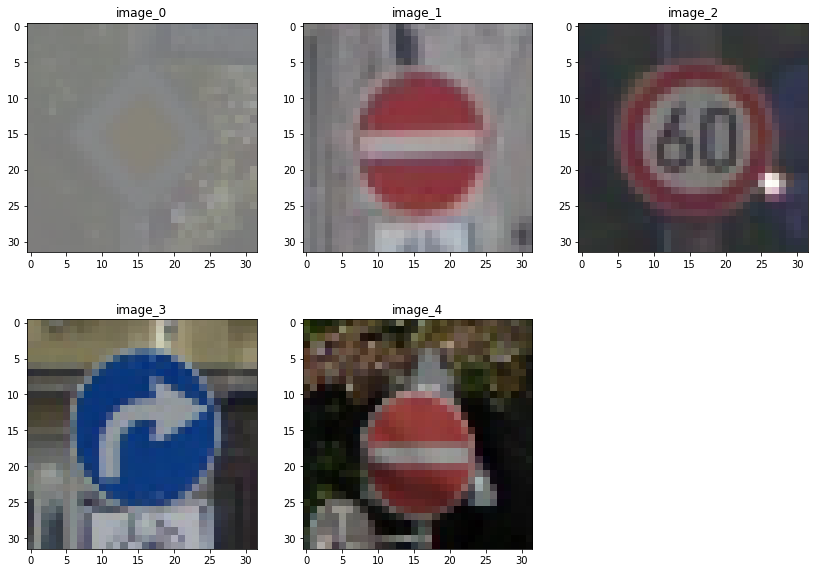

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2

fig, axes4 = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
axes4 = axes4.flatten()

X_new = np.zeros((5,32,32,3)).astype(np.uint8)

for i in range(5):
    # images are screenshots from Google street view in Munich, Germany
    image = cv2.imread('test_images/image_{}.png'.format(i), cv2.IMREAD_COLOR)
    image = cv2.resize(image,(32, 32))
    X_new[i,:,:,:] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes4[i].imshow(X_new[i,:,:,:])
    axes4[i].set_title('image_{}'.format(i))
fig.delaxes(axes4[5])
plt.show()

# set the labels for these pictures
y_new = [12, 17,  3, 33, 17]


### Predict the Sign Type for Each Image

In [47]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# preprocessing
X_new = (X_new-127.5)/127.5

with tf.Session() as sess:
    saver.restore(sess, './training')
    prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: X_new, keep_prob: 1.0})
for i in range(5):
    print('image_{} is class: {}, {}'.format(i, prediction[i], sign_names['SignName'][prediction[i]]))


INFO:tensorflow:Restoring parameters from ./training
image_0 is class: 12, Priority road
image_1 is class: 17, No entry
image_2 is class: 3, Speed limit (60km/h)
image_3 is class: 33, Turn right ahead
image_4 is class: 17, No entry


### Analyze Performance

In [48]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './training')
    new_accuracy, _ = evaluate(X_new, y_new)
    print('Accuracy on new imagess: {:.3f}'.format(new_accuracy))

INFO:tensorflow:Restoring parameters from ./training
Accuracy on new imagess: 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [49]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './training')
    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: X_new, keep_prob: 1.0})
print('| filename | rank of class | softmax prob | class index | class text |')
print('| --- | --- | --- | --- | --- |')
for i in range(5):
    #print(top5[0][i], top5[1][i])
    for j in range(5):
        print('| image{} | {} |  {:.2e} | {} | {} |'.format(i, j+1, top5[0][i][j], top5[1][i][j], sign_names['SignName'][top5[1][i][j]]))
    print('| --- | --- | --- | --- | --- |')


INFO:tensorflow:Restoring parameters from ./training
| filename | rank of class | softmax prob | class index | class text |
| --- | --- | --- | --- | --- |
| image0 | 1 |  5.87e-01 | 12 | Priority road |
| image0 | 2 |  1.78e-01 | 13 | Yield |
| image0 | 3 |  2.28e-02 | 35 | Ahead only |
| image0 | 4 |  1.91e-02 | 36 | Go straight or right |
| image0 | 5 |  1.82e-02 | 9 | No passing |
| --- | --- | --- | --- | --- |
| image1 | 1 |  1.00e+00 | 17 | No entry |
| image1 | 2 |  4.53e-14 | 14 | Stop |
| image1 | 3 |  8.17e-17 | 34 | Turn left ahead |
| image1 | 4 |  6.77e-17 | 12 | Priority road |
| image1 | 5 |  2.39e-17 | 22 | Bumpy road |
| --- | --- | --- | --- | --- |
| image2 | 1 |  1.00e+00 | 3 | Speed limit (60km/h) |
| image2 | 2 |  1.46e-15 | 35 | Ahead only |
| image2 | 3 |  1.32e-15 | 23 | Slippery road |
| image2 | 4 |  8.64e-16 | 34 | Turn left ahead |
| image2 | 5 |  6.54e-16 | 16 | Vehicles over 3.5 metric tons prohibited |
| --- | --- | --- | --- | --- |
| image3 | 1 |  1.0

It is safe to say that the classifier is very much sure of the results.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


### Comment
I played around with this a little bit without reaching a lot of conclusions. Please just ignore the code and plots below.

In [76]:
# load some pics, which don't contain traffic signs (also from Google street view)
fig, axes5 = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
axes5 = axes5.flatten()

X_not_a_sign = np.zeros((3,32,32,3)).astype(np.uint8)

for i in range(3):
    # images are screenshots from Google street view in Munich, Germany
    image = cv2.imread('test_images/not_a_sign_{}.png'.format(i), cv2.IMREAD_COLOR)
    image = cv2.resize(image,(32, 32))
    X_not_a_sign[i,:,:,:] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes5[i].imshow(X_not_a_sign[i,:,:,:])
    axes5[i].set_title('not_a_sign_{}'.format(i))
plt.show()
# preprocessing
X_not_a_sign = (X_not_a_sign-127.5)/127.5

In [77]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    sess = tf.get_default_session()
    activation = sess.run(tf_activation, feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,25))
    
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./training


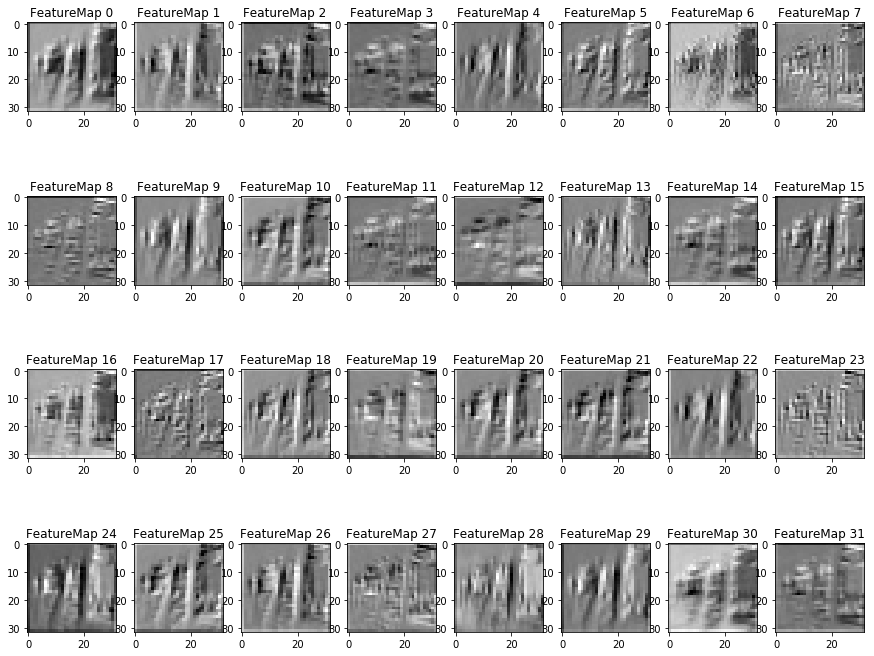

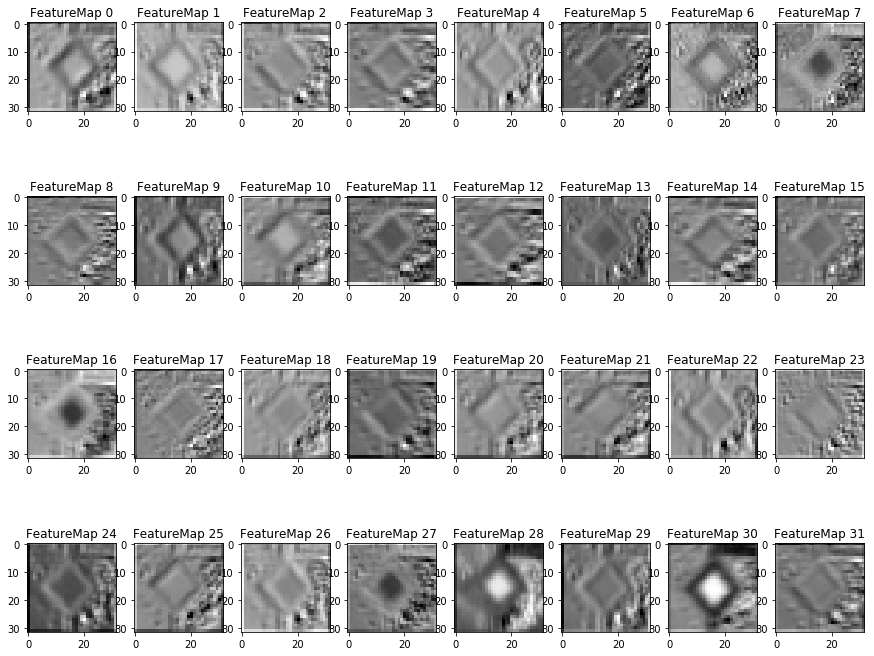

In [54]:
with tf.Session() as sess:
    saver.restore(sess, './training')
    conv1 = sess.graph.get_tensor_by_name('Conv2D:0')
    X_visu = np.zeros((1,32,32,3))
    #X_visu[0,:,:,:] = X_new[0,:,:,:]
    X_visu[0,:,:,:] = X_not_a_sign[0,:,:,:]
    outputFeatureMap(X_visu, conv1, -1, -1, 1)
    X_visu[0,:,:,:] = X_new[0,:,:,:]
    outputFeatureMap(X_visu, conv1, -1, -1, 2)